In [1]:
#import autograd.numpy as np
#from autograd.scipy.integrate import odeint
#from autograd import jacobian
#from autograd.builtins import tuple
from torchdiffeq import odeint, odeint_adjoint
from torch import nn
import numpy as np
import torch as tch

#odeint(func, y0, t)
import matplotlib.pyplot as plt

#Ca0 = tch.tensor(1.0)
#k1 = k_1 = tch.tensor(3.0, dtype=t.float64)
#odeint(func, y0, t)
#tspan = tch.from_numpy(np.linspace(0, 0.5, 50))
tspan = tch.linspace(0, 0.5, 50, requires_grad=True)


def f(t,z):
    z0,z1,z2 = tch.unbind(z)
#    return tch.stack((z[0]**2 - z[1], z[1]**1, z[2]**1-z[1]) )
    return tch.stack((z0**2 - z1, z1**1, z2**1-z1) )


class Lambda(nn.Module):
    #def forward(self, t, y):
        #return torch.mm(y**3, true_A)
    def forward(self, t,z):
        return tch.sin(z)
        #z0,z1,z2 = tch.unbind(z)
        #return tch.stack((z[0]**2 - z[1], z[1]**1, z[2]**1-z[1]) )

def C(z0):
    #z0 = t.tensor(z0, dtype=t.float64, requires_grad=True )
    
    #sol = odeint(f, z0, tspan)

    return sol
z0 =[1.,2.,3.0]
z0 = tch.tensor(z0, dtype=t.float64 , requires_grad=True)
#ol = C( z0)
sol = odeint_adjoint(Lambda(), z0, tspan)
#sol = odeint(f, z0, tspan)


ModuleNotFoundError: No module named 'torchdiffeq'

In [141]:
loss = tch.sum(sol[-1])
loss.backward(tch.ones(loss.shape) )
loss.grad

In [144]:
sol.backward(tch.ones(sol.shape))
sol.grad

In [129]:
sol.grad.

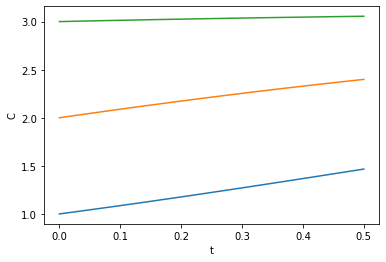

In [137]:
plt.plot(tspan.detach().numpy(), sol.detach().numpy() )
#plt.xlim([tspan.min(), tspan.max()])
plt.xlabel('t')
plt.ylabel('C');

In [92]:
#sol[-1].backward(z0)


In [93]:
L.backward(torch.ones(L.shape))

AttributeError: 'NoneType' object has no attribute 'data'

In [38]:
odeint?

Signature: odeint(func, y0, t, rtol=1e-07, atol=1e-09, method=None, options=None)
Docstring:
Integrate a system of ordinary differential equations.

Solves the initial value problem for a non-stiff system of first order ODEs:
    ```
    dy/dt = func(t, y), y(t[0]) = y0
    ```
where y is a Tensor of any shape.

Output dtypes and numerical precision are based on the dtypes of the inputs `y0`.

Args:
    func: Function that maps a Tensor holding the state `y` and a scalar Tensor
        `t` into a Tensor of state derivatives with respect to time.
    y0: N-D Tensor giving starting value of `y` at time point `t[0]`. May
        have any floating point or complex dtype.
    t: 1-D Tensor holding a sequence of time points for which to solve for
        `y`. The initial time point should be the first element of this sequence,
        and each time must be larger than the previous time. May have any floating
        point dtype. Converted to a Tensor with float64 dtype.
    rtol: optional fl

In [106]:
sol.grad_fn

In [8]:
t.tensor(5)

tensor(5)

Elapsed time = 23.8 seconds


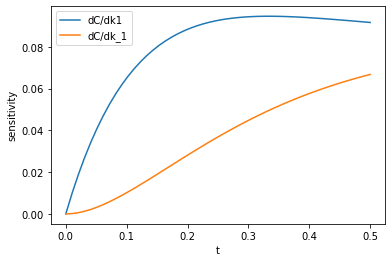

In [2]:
import time
t0 = time.time()
dCdk = jacobian(C, 0)


k_sensitivity = dCdk(np.array([k1, k_1]))

k1_sensitivity = k_sensitivity[:, 0, 0]
k_1_sensitivity = k_sensitivity[:, 0, 1]

plt.plot(tspan, np.abs(k1_sensitivity), label='dC/dk1')
plt.plot(tspan, np.abs(k_1_sensitivity), label='dC/dk_1')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('sensitivity')
print(f'Elapsed time = {time.time() - t0:1.1f} seconds')

In [4]:
import jax

ModuleNotFoundError: No module named 'jaxlib'

In [76]:
import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient 
print(x.grad.data) #Prints '3' which is dz/dx 

tensor(3.)


# TF
test differentiating an ODE solves using "tfdiffeq".

In [10]:
import tfdiffeq as td

from tfdiffeq import odeint
#from tfdiffeq import cast_double
import tensorflow as tf
tf.keras.backend.set_floatx('float64') # Presumably can get more speed, especially on a GPU, 
#if we used float32
import numpy as np
import pylab as pl
#import torch as tch

#odeint(func, y0, t)
import matplotlib.pyplot as plt

@tf.function
def f(t, z, pars): # The actual function, dz_dt
    # y now reprents the a vector of [u, v]
    #u, v = y[0], y[1]
    
    #self.val.assign_add( 1)
    return z**2*pars* tf.exp(-z/10)
    #z0,z1,z2 = z
    #z0_dt = z[0]**2 - z[1]
    #z1_dt = pars[0]*tf.abs(t-pars[1])**2*z[1]**1
    #z2_dt = z[2]**1-z[1]
    #du_dt = v
    #dv_dt = 5 * v - 6 * u
    #return tf.stack([z0_dt, z1_dt, z2_dt])

class Lambda(tf.keras.Model):
    
    def __init__(self, pars,f): #pars are parameters to the ode
        self.pars=pars
        self.Nevals = tf.Variable(0)#tf.convert_to_tensor(0, dtype=tf.int64)
        self.f = tf.function(f)
        super().__init__()
    
    @tf.function
    def call(self, t, z):
        self.Nevals.assign_add(1)
        return self.f(t,z,self.pars)
        #self.val.assign_add( 1)
        #return z**2*self.pars* tf.exp(-z/10)*t
        
#     def call(self, t, z): # The actual function, dz_dt
#         #return f(t,z, self.pars)
#         # y now reprents the a vector of [u, v]
#         #u, v = y[0], y[1]
#         #z0,z1,z2 = z
#         z0_dt = z[0]**2 - z[1] 
#         z1_dt = self.pars[0]*tf.abs(t-self.pars[1])**2*z[1]**1
#         z2_dt = z[2]**1-z[1]
#         #du_dt = v
#         #dv_dt = 5 * v - 6 * u
#         self.val.assign_add( 1)
#         return tf.stack([z0_dt, z1_dt, z2_dt])
    
    #return tf.stack([du_dt, dv_dt])  # vector of shape [2]


[autoreload of spylind.spyIVP failed: Traceback (most recent call last):
  File "/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/IPython/extensions/autoreloa

In [16]:
with tf.device("/cpu:0"):
    tspan = tf.linspace(0.0, 5.0, 400)
    z0 = tf.linspace(0,2,1000) # initial values
    z0 = tf.convert_to_tensor(z0, dtype=tf.float64)
    p0 = tf.linspace(-4, 4,1000) #parameters for the ODE
    p0 = tf.convert_to_tensor(p0, dtype=tf.float64)
    ode = Lambda(p0, f)
    #tspan =td.cast_double(tspan)
    #ol = C( z0)
    %time sol = odeint(ode, z0, tspan, method='dopri5')
    #sol = odeint(f, z0, tspan)
    #L = tf.reduce_sum(sol[-1])

CPU times: user 688 ms, sys: 3 ms, total: 691 ms
Wall time: 715 ms


In [3]:

    
with tf.device("/cpu:0"):
    with tf.GradientTape() as g:
        g.watch(p0)
        ode = Lambda(p0)

        #g.watch(z0)
        
        #tspan = tf.linspace(0.0, 2, 1000)
        #tspan =td.cast_double(tspan)
        #ol = C( z0)
        %time sol = odeint(ode, z0, tspan, method='adams')
        #sol = odeint(f, z0, tspan)
        L = tf.reduce_sum(sol[-1])


TypeError: __init__() missing 1 required positional argument: 'f'

In [ ]:
ode.val

In [79]:
L

<tf.Tensor: shape=(), dtype=float64, numpy=37932.76585269482>

In [82]:
%time dsol_dz = g.gradient(L, p0)

CPU times: user 2.67 s, sys: 64.8 ms, total: 2.73 s
Wall time: 2.51 s


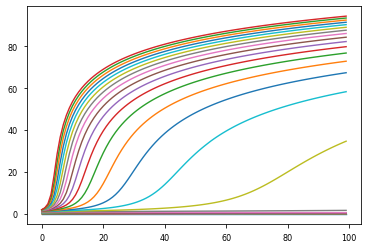

In [80]:
pl.plot(sol[:,::30])

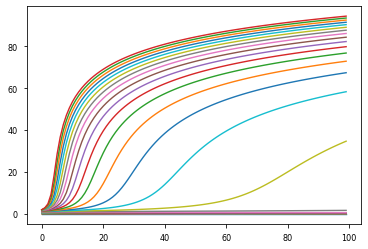

In [76]:
pl.plot(sol[:,::30])

In [69]:
#pl.plot(sol)

In [83]:
dsol_dz

<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([ 0.00000000e+00,  7.34075084e+03,  8.58407524e+04,  3.30432847e+05,
        8.18119238e+05,  1.60137469e+06,  2.71170689e+06,  4.16399596e+06,
        5.95996869e+06,  8.09075296e+06,  1.05387291e+07,  1.32788861e+07,
        1.62798363e+07,  1.95045950e+07,  2.29111975e+07,  2.64532001e+07,
        3.00801001e+07,  3.37376967e+07,  3.73684074e+07,  4.09115525e+07,
        4.43036147e+07,  4.74784791e+07,  5.03676588e+07,  5.29005076e+07,
        5.50044235e+07,  5.66050436e+07,  5.76264322e+07,  5.79912625e+07,
        5.76209939e+07,  5.64360431e+07,  5.43559521e+07,  5.12995517e+07,
        4.71851212e+07,  4.19305447e+07,  3.54534637e+07,  2.76714270e+07,
        1.85020363e+07,  7.86309018e+06, -4.32727653e+06, -1.81504553e+07,
       -3.36872300e+07, -5.10176461e+07, -7.02208823e+07, -9.13751251e+07,
       -1.14557448e+08, -1.39843691e+08, -1.67308346e+08, -1.97024440e+08,
       -2.29063429e+08, -2.63495089e+08, -3.0038741

In [17]:
sol[-1]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.21025278, 2.09066148, 3.77962996])>

In [4]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0

In [5]:
sol

<tf.Tensor: shape=(10, 3), dtype=float64, numpy=
array([[1.        , 2.        , 3.1       ],
       [0.94080566, 2.01698345, 3.1623503 ],
       [0.87416031, 2.03199163, 3.22734861],
       [0.79990744, 2.04511868, 3.29525646],
       [0.71805308, 2.05646788, 3.36634463],
       [0.62880523, 2.06615045, 3.44089327],
       [0.53259905, 2.07428458, 3.51919197],
       [0.43011572, 2.0809944 , 3.60153989],
       [0.32228107, 2.08640896, 3.68824615],
       [0.21025278, 2.09066148, 3.77962996]])>

In [135]:
@tf.function
def f(a):
    return tf.constant(1j)*a

def tf_realify(tf_func):
    tf.print(tf_func.function_spec.input_signature)
    @tf.function
    def f_wrapped(a,b):
        return tf_func(tf.cast(a, tf.complex128)+1j*tf.cast(b, tf.complex128) )
    return f_wrapped

f2=tf_realify(f)
f2(3,1)

None


<tf.Tensor: shape=(), dtype=complex128, numpy=(-1+3j)>

In [143]:
a, b = tf.constant(3, dtype=tf.float64), tf.constant(1, dtype=tf.float64)
%timeit f2(a,b)

The slowest run took 4.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 146 µs per loop


In [145]:
c = tf.constant(1+1j, dtype=tf.complex128)
%timeit f(c)

The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 134 µs per loop


In [121]:
tf.constant(1j)

<tf.Tensor: shape=(), dtype=complex128, numpy=1j>

In [108]:
cf=f.get_concrete_function(0.5,z0, p0)

In [110]:
cf.

[<tf.Tensor 'z:0' shape=(1000,) dtype=float64>,
 <tf.Tensor 'pars:0' shape=(1000,) dtype=float64>]

In [112]:
f.function_spec.input_signature

In [113]:
cf.structured_input_signature

((0.5,
  TensorSpec(shape=(1000,), dtype=tf.float64, name='z'),
  TensorSpec(shape=(1000,), dtype=tf.float64, name='pars')),
 {})

In [148]:
@tf.function
def f1(a,b,c):
    return a+b+c
@tf.function
def f2(a,b,c):
    return a+b
@tf.function
def f3(a,b,c):
    return a

fL = [f1,f2,f3]

In [165]:
def get_wrapped(fL):
    @tf.function(experimental_compile=True)
    def f_c(p):
        return tf.stack([f(a,b,c) for f in fL])
    return f_c

f_c = get_wrapped(fL)
f_c(1.5,2.5,3.5)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([7.5, 4. , 1.5], dtype=float32)>

In [167]:
%timeit f_c(1.5,2.5,3.5)

The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 159 µs per loop


In [18]:
@tf.function
def f(a,b,c):
    return (a+b+c)

@tf.function
def tf_unpack(vals):
    #for k in range(100):
    #    f(*tf.unstack(vals))
    return f(*tf.unstack(vals))
   

In [19]:
vals = tf.convert_to_tensor(np.arange(3)*0.5)


The slowest run took 477.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 139 µs per loop


In [23]:
%timeit tf_unpack(vals)

The slowest run took 6.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 138 µs per loop


In [24]:
fp = lambda vals:tf.math.real(tf_unpack(vals)) 
fp = tf.function(fp)

In [26]:
%timeit fp(vals)

The slowest run took 8.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 138 µs per loop


In [7]:
T=tf.convert_to_tensor(1 + 0.5j)

In [8]:
tf.math.real(T)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

# Testing pyIVP and tensorflow

In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sympy as sm
from spylind import spyIVP as so
from pylab import *
xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
g= -10.0
dy_dtD = {xS:vxS, 
       yS:vyS,
       vxS:0,
       vyS:g }
ode_s = so.ODESolver(dy_dtD,  dims={}, backend='tensorflow', default_dtype=np.float64)
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 
ode_s.setup()
tSteps = np.linspace(0,1,10000)
%time arr =ode_s.integrate(tSteps, 1.0)

sm.ode
plot(tSteps, arr.real)
xlabel('t')
legend(dy_dtD.keys())

Munch({'tSym': t, 'dimSyms': [], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': []})
state dependent functions should have signature [t, x, y, v_x, v_y]
CPU times: user 5.8 s, sys: 102 ms, total: 5.9 s
Wall time: 7.15 s


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'real'

In [4]:
import tensorflow as tf
xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
zS = sm.symbols("z", real=True)
g= tf.constant(-10.0, dtype='float64')
dy_dtD = {xS:vxS, 
       yS:vyS ,
       vxS:0 +zS,
       vyS: g  }

ode_s = so.ODESolver(dy_dtD,  dims={zS:linspace(-2,2,10000)}, backend='numpy', default_dtype='float64')
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 
ode_s.setup(bForceStateDimensions=True)
tSteps = linspace(0,200,4)
%time arr =ode_s.integrate(tSteps, 1.0)
if 0:
    plot(tSteps, arr[:,:,0].real)
    xlabel('t')
    legend(dy_dtD.keys())
    figure()
    plot(tSteps, arr[:,:,-1].real)
    xlabel('t')
    legend(dy_dtD.keys())
    figure()
    imshow(arr[:,1,:].real, aspect='auto')

Munch({'tSym': t, 'dimSyms': [z], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': [z]})
state dependent functions should have signature [t, z, x, y, v_x, v_y]
Not integrating first step (it's just the initial state)
CPU times: user 242 ms, sys: 149 ms, total: 391 ms
Wall time: 259 ms


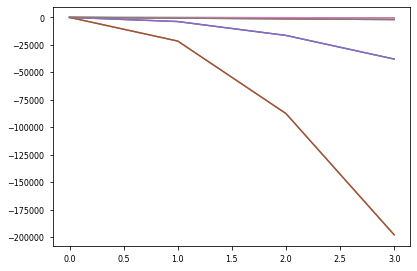

In [5]:
plot(arr[:,:,5])
plot(arr[:,:,9])

In [6]:
xRef =tf.linspace(0,1,1000)
yRef = tf.sin(5*pi*xRef)

In [7]:
def tf_interpolator(xOrig, yOrig):
    xOrig = tf.convert_to_tensor(xOrig, dtype=tf.float64)
    yOrig = tf.convert_to_tensor(yOrig, dtype=tf.float64)
    N = xOrig.shape[0]
    dx = xOrig[1]-xOrig[0]
    x0 = xOrig[0]
    xMax = xOrig[-1]
    zero = tf.constant(0, dtype=tf.float64)
    #@tf.function(experimental_compile=True)
    def f(x):
        #pdb.set_trace()
        #ind = tf.math.floormod((x-x0), dx)
        
        if x>=xMax or x<x0:
            return zero#tf.constant(0., dtype=tf.float64);
        else:
            ind = tf.math.floordiv(x-x0, dx)
            remainder = x- ind*dx
            ind=tf.cast(ind, tf.int64)

            return (1.-remainder)*yOrig[ind] + remainder*yOrig[ind+1]
    return f

intpF = tf.function(tf_interpolator(xRef, yRef))
f = tf.function(intpF, experimental_compile=True)

In [8]:
xOut =linspace(-0.01, 1.01, 1000)
yOut = np.array([intpF(val) for val in xOut])
    

In [9]:
#randL =np.random.normal(size=10000)
f = tf.function(lambda x: x**2)
f = intpF
randL = tf.random.uniform(minval=0.01, maxval=0.9, shape=(10000,), dtype=tf.float64 )
randL2 = tf.random.uniform(minval=0.01, maxval=0.9, shape=(10000,), dtype=tf.float64 )
randL3 = tf.random.uniform(minval=0.01, maxval=0.9, shape=(10000,), dtype=tf.float64 )


def test(randL):
    for val in randL:
        a = f(val)
t= tf.function(test, experimental_compile=True)


In [182]:
%timeit intpF(tf.random.uniform(minval=-0.01, maxval=1.01, dtype=tf.float64, shape=[]))

426 µs ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
tf.timeit tf.random.unifi

In [100]:
#%time t(randL3)
%time t(randL)

InvalidArgumentError: Argument 0 to function '__inference_f_1488041' must be a compile-time constant, but unable to resolve argument value to a constant.
	 [[{{node while}}]] [Op:__inference_test_1488155]

In [118]:
%time t(randL)
%time t(randL2)
%time t(randL3)

CPU times: user 0 ns, sys: 1e+03 µs, total: 1e+03 µs
Wall time: 671 µs
CPU times: user 1e+03 µs, sys: 0 ns, total: 1e+03 µs
Wall time: 1.49 ms
CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 609 µs


In [6]:
%timeit intpF(tf.constant(0.5, dtype='float64'))

230 µs ± 50.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit f(c)

In [67]:

#f = tf.function(intpF, experimental_compile=True)
f = intpF
def test(randL):
    return tf.map_fn(f, randL)
t= tf.function(test, experimental_compile=True)
out = t(randL)
%time out=t(randL2)
%time out=t(randL3)

CPU times: user 40 ms, sys: 1 ms, total: 41 ms
Wall time: 41.2 ms
CPU times: user 42 ms, sys: 0 ns, total: 42 ms
Wall time: 41.3 ms


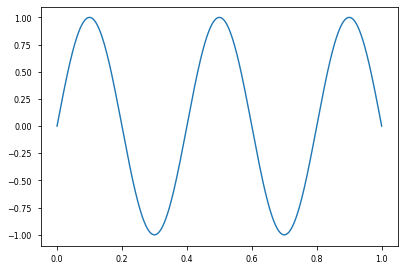

In [70]:
plot(xRef, yRef)

# Autograd and interpolating

In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sympy as sm
from spylind import spyIVP as so
from pylab import *
import time
from spylind.tf_misc import tf_interpolator2
if 0:
    def tf_interpolator(xOrig, yOrig):
        xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
        yOrig = tf.constant(tf.convert_to_tensor(yOrig, dtype=tf.float64))

        N = xOrig.shape[0]
        dx = xOrig[1]-xOrig[0]
        x0 = xOrig[0]
        xMax = xOrig[-1]
        zero = tf.constant(0, dtype=tf.float64)
        #@tf.function(experimental_compile=True)
        def f(x):
            #pdb.set_trace()
            #ind = tf.math.floormod((x-x0), dx)

            if x>=xMax or x<x0:
                return zero#tf.constant(0., dtype=tf.float64);
            else:
                ind_f = tf.math.floordiv(x-x0, dx)
                remainder = (x/dx- ind_f)
                ind=tf.cast(ind_f, tf.int64)
                #tf.print(remainder)
                return (1.-remainder)*yOrig[ind] + remainder*yOrig[ind+1]
        return f
    def tf_interpolator2(xOrig, yOrig):
        xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
        #yOrig = tf.constant(tf.convert_to_tensor(yOrig, dtype=tf.float64))

        N = xOrig.shape[0]
        dx = xOrig[1]-xOrig[0]
        x0 = xOrig[0]
        xMax = xOrig[-1]
        zero = tf.constant(0, dtype=tf.float64)
        mask = tf.concat([tf.constant([0.5,0.5], dtype='float64'), tf.zeros(xOrig.shape[0]-2, dtype='float64') ], axis=0)
        def f(x):
            #pdb.set_trace()
            #ind = tf.math.floormod((x-x0), dx)

            if x>=xMax or x<x0:
                return zero#tf.constant(0., dtype=tf.float64);
            else:
                ind = tf.math.floordiv(x-x0, dx)
                remainder = x- ind*dx
                ind=tf.cast(ind, tf.int64)
                res = tf.roll(mask, ind, axis=0)*yOrig
                return tf.reduce_sum(res)
        return f



In [3]:


xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
drvS = sm.symbols("D", real=True)

zS = sm.symbols("z", real=True)
#g= tf.constant(-10.0, dtype='float64')
g = -10.
dy_dtD = {xS:vxS, 
       yS:vyS ,
       vxS:0 +0*zS,
       vyS: g + drvS  }

@tf.function(experimental_compile=True)
def f_driving(t):
    return 30*tf.sin(2*pi*t)


tDrv = linspace(0,2,100)
yDrv0 = 0*tf.sin(2*pi*tDrv) + 10
#yDrv0 = tf.convert_to_tensor(yN.repeat(4), dtype='float64')
ode_s = so.ODESolver(dy_dtD,  dims={zS:linspace(-2,2,10)}, backend='tensorflow', default_dtype='float64')
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 

def calc_g(yDrv):
    yDrv =tf.convert_to_tensor(yDrv, dtype='float64')
    f_driving = tf.function(tf_interpolator2(tDrv, yDrv), experimental_compile=False)

    ode_s.set_driving({drvS:f_driving})
    ode_s.setup(bForceStateDimensions=True)
    tSteps = linspace(0,1.8,20)

    with tf.device("/cpu:0"):
        with tf.GradientTape(watch_accessed_variables=False) as g:
            #g.watch(p0)
            g.watch(yDrv)
            #arr =ode_s.integrate(tSteps, 1.0)
            tStart = time.time()
            arr = ode_s.integrate(tDrv,1.0, method='rk4', solver_options=dict(step_size = (tDrv[1]-tDrv[0])/2 ) ) 
            print("time taken: ", tStart-time.time())
            #print(arr.shape)
            #L=tf.pow(tf.reduce_mean(arr[-1,1]), 2)
            L=tf.reduce_mean(tf.pow(arr[-30:,1],2))
            #L = arr[-8:,1, 1]**2
            #L = arr[-5:,1]

    print(L.numpy())
    grad = g.gradient(L, yDrv)
    return arr[:,1],grad, L

Munch({'tSym': t, 'dimSyms': [z], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': [D]})
state dependent functions should have signature [t, z, x, y, v_x, v_y]


In [78]:
from scipy import optimize
def f(yDrv):
    y, grad, L =calc_g(yDrv)
    return L.numpy().squeeze(), grad.numpy()
res=optimize.minimize(f, yDrv0, jac=True)
 

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.4056198596954346
294.4665510322082
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.4158422946929932
288.11724547402156
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.6745526790618896
263.41389561831136
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.5247461795806885
175.70245422805414
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.3891596794128418
18.057207271862097
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.4140186309814453
0.7841116836639345
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -2.0409984588623047
0.7834604735408546
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.576878547668457
0.7808584804798955
Nevals: <tf.Variable 'Variable:0' shape=() dtype=i

In [75]:
y,grad,L= calc_g(res.x)

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.4418601989746094
3.0830106257856106e-06


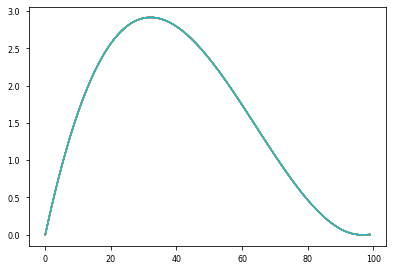

In [76]:
plot(y)

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5739936828613281
322.4376731301938


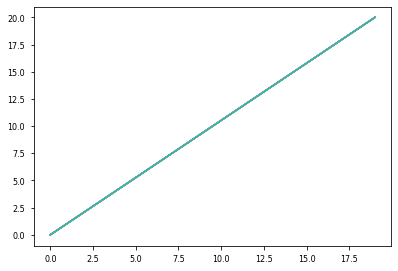

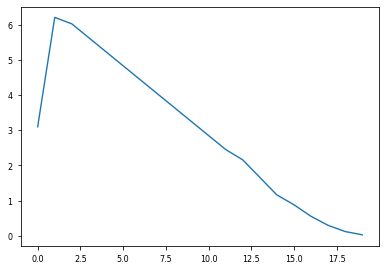

In [36]:
grad, yVals =calc_g(1*yDrv0)
plot(yVals)
figure()
plot(grad)

In [49]:
#yDrv = tf.identity(yDrv0)
yDrvL = []
gradL = []
yValsL = []
for k in range(30):
    grad, yVals =calc_g(yDrv)
    yDrv = yDrv - 4*grad
    yDrvL.append(yDrv)
    gradL.append(grad)
    yValsL.append(yVals)

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.6864047050476074
0.4774245330185216
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.6651170253753662
0.4710911934104487
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5408155918121338
0.46484233992072505
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5213944911956787
0.4586768453824449
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5175118446350098
0.45259359766677526
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5104200839996338
0.44659149948232646
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5033252239227295
0.4406694681771968
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.4954051971435547
0.4348264355436618
Nevals: <tf.Variable 'Variable:0' shape=() dt

KeyboardInterrupt: 

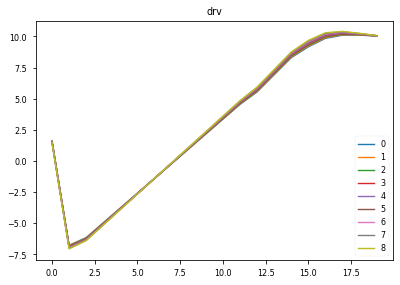

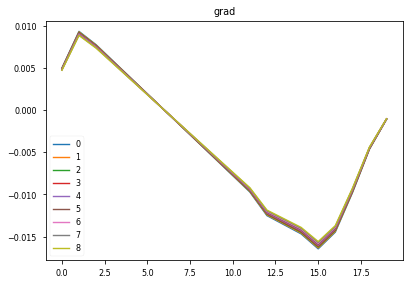

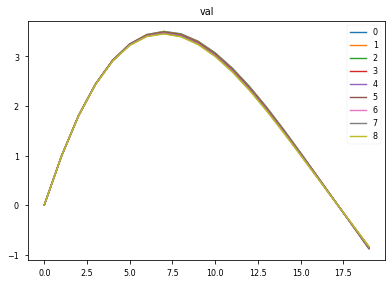

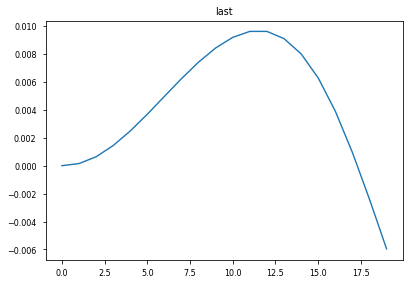

In [51]:
#plot(yDrv0)
slc = slice(0,30)
for y in yDrvL[slc]:
    plot(y)
legend(arange(10))
title('drv')
figure()
for y in gradL[slc]:
    plot(y)
legend(arange(10))
title('grad')
if 1:
    figure()
    for y in yValsL[slc]:
        plot(tf.reduce_mean(y, axis=-1))
    legend(arange(10))
    title('val')
    k =-1
    figure()
    plot(tf.reduce_mean(yValsL[-2], axis=-1)-tf.reduce_mean(yValsL[-1], axis=-1))
    title('last')

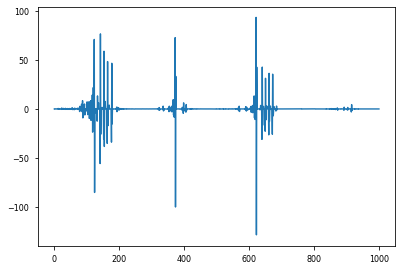

In [45]:
plot(grad)

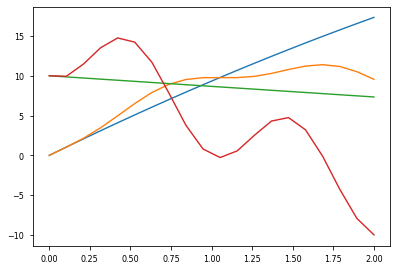

In [34]:
plot(tSteps, arr[:,:,50])

In [9]:
tf.constant(tf.linspace(0,1,1000))

<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.0700

In [ ]:
tf.math.interp_regular_1d_grid(
    x, x_ref_min, x_ref_max, y_ref, axis=-1, fill_value='constant_extension',
    fill_value_below=None, fill_value_above=None, grid_regularizing_transform=None,
    name=None
)

In [19]:
mask=tf.concat([tf.constant([1,1], dtype='float64'), tf.zeros(98, dtype='float64') ], axis=0)

In [26]:
tf.reduce_sum(mask)

<tf.Tensor: shape=(), dtype=float64, numpy=2.0>

# Scratch test

In [9]:


from tfdiffeq import odeint
#from tfdiffeq import cast_double
import tensorflow as tf
tf.keras.backend.set_floatx('float64') # Presumably can get more speed, especially on a GPU, 
#if we used float32
import numpy as np
from matplotlib.pyplot import *
#odeint(func, y0, t)
import matplotlib.pyplot as plt
tf.ceil=tf.math.ceil


#def interpolator(xRef, yRef):
    
def tf_interpolator3(xOrig, yOrig):
    #xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
    #yOrig = tf.constant(tf.convert_to_tensor(yOrig, dtype=tf.float64))
    
    N = xOrig.shape[0]
    dx = xOrig[1]-xOrig[0]
    x0 = xOrig[0]
    xMax = xOrig[-1]
    zero = tf.constant(0, dtype=tf.float64)
    #@tf.function(experimental_compile=True)
    def f(x):
        #pdb.set_trace()
        #ind = tf.math.floormod((x-x0), dx)
        
        if x>=xMax or x<x0:
            return zero#tf.constant(0., dtype=tf.float64);
        else:
            ind_f = tf.math.floordiv(x-x0, dx)
            remainder = (x/dx- ind_f)
            ind=tf.cast(ind_f, tf.int64)
            w0 = (1.-remainder)
            w1 = remainder
            res=tf.reduce_sum(tf.stack([w0,w1])*tf.gather(yOrig, [ind,ind+1]))
            #tf.print(res)
            return res
            #tf.print(remainder)
            #return *yOrig[ind] + remainder*yOrig[ind+1]
    return f


class Lambda(tf.keras.Model):
    
    def __init__(self, tDrv, yDrv): #pars are parameters to the ode
        #self.pars=pars
        #self.Nevals = tf.Variable(0)#tf.convert_to_tensor(0, dtype=tf.int64)
        #self.f = tf.function(f)
        super().__init__()
        
        self.f = tf.function(tf_interpolator2(tDrv, yDrv), experimental_compile=False)
    
    @tf.function
    def call(self, t, z):

        y, vy= z[0], z[1]
        d_y = vy
        d_vy = self.f(t)
        return tf.stack([d_y, d_vy])
    

with tf.device("/cpu:0"):
    with tf.GradientTape(watch_accessed_variables=False) as g:
        tDrv = tf.cast(tf.linspace(0.,20.1, 100), dtype=tf.float64)
        yDrv = tf.Variable(-3*tf.ones(tDrv.shape[0], dtype=tf.float64))
        g.watch(yDrv)

        tspan = tf.linspace(0.0, 20., 10) 
        z0 = tf.convert_to_tensor([0,10.], dtype=tf.float64)
        #f = tf.function(lambda t: tf.constant(-1.0, dtype='float64') )
        ode = Lambda(tDrv, yDrv)
        #tspan =td.cast_double(tspan)
        #ol = C( z0)
        #sol = odeint(ode, z0, tspan, method='dopri5', options=dict(max_step_size=0.1 ) )
        sol = odeint(ode, z0, tspan, method='rk4', options=dict(step_size=tDrv[1]-tDrv[0]))#, options=dict(step_size=0.08080808073282242 ) )

        #%time sol = odeint(ode, z0, tspan, method='rk4')
        #sol = odeint(f, z0, tspan)
        L = sol[-1,0]
    %time grad=g.gradient(L, yDrv)

CPU times: user 292 ms, sys: 13 ms, total: 305 ms
Wall time: 276 ms


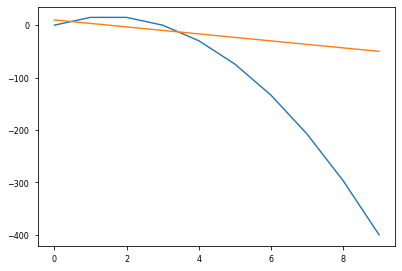

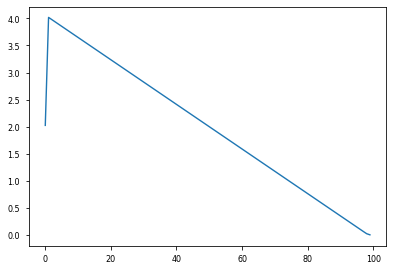

In [61]:

plot(sol)
figure()
plot(grad)

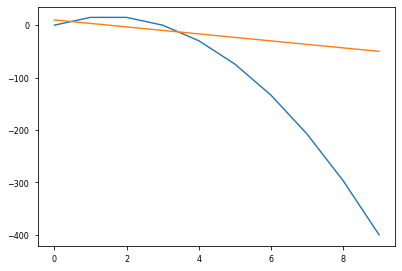

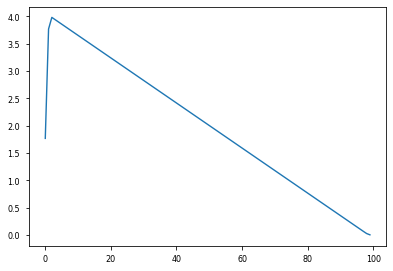

In [63]:

plot(sol)
figure()
plot(grad)

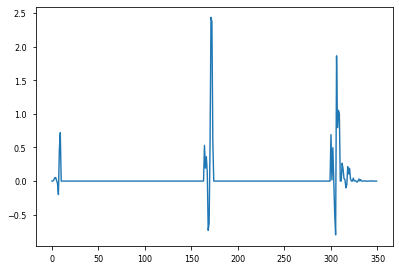

In [63]:
plot(grad.values)

In [54]:
tf.gather(yDrv, 8)

<tf.Tensor: shape=(), dtype=float64, numpy=-3.0>

In [55]:
import tfdiffeq as tfd
tfd.solvers.FixedGridODESolver?

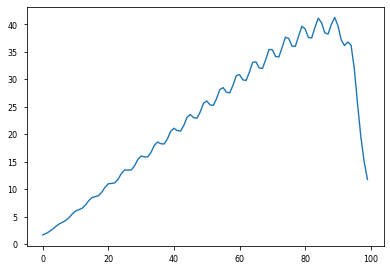

In [91]:
def lor(center):
    return 1/(0.4+ (x-center)**2 )

y = linspace(0,10,20)
x = arange(20)
msk = lor(5)
#M = np.diag(  )
plot([y.dot(lor(val)) for val in linspace(0,20,100) ])

In [93]:
odeint

In [41]:
tf.concat([tf.range(0,5,1.5), [0]], axis=0)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0. , 1.5, 3. , 4.5, 0. ], dtype=float32)>

In [10]:
import qutip as q

In [24]:

q.sigmax()
K1, K2 = q.basis(2,0), q.basis(2,1)

In [12]:
q.sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [23]:
a=q.destroy(2)
1j*(a.dag()-a)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [34]:
a = K1*K2.dag()# + K2*K1.dag()
sx = a + a.dag()
sy = 1j*(a.dag()-a)
sx,sy

(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]])

In [26]:
a.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [30]:
a

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]